In [1]:
import pandas as pd
import weibull # https://pypi.org/project/weibull/
#import reliability # https://pypi.org/project/reliability/


C:\Users\F8058552\AppData\Roaming\Python\Python310\site-packages\weibull\__init__.py:9: UserWarning: The "weibull" module is being superceded by the "reliability" module and will no longer be maintained. Please refactor your code for this alternative model and thank you for using weibull!
  warnings.warn('The "weibull" module is being superceded by the "reliability" module and will no longer be maintained. '


In [3]:
#!pip install weibull --user
#!pip install reliability --user

In [2]:
# Ler a tabela a partir de um arquivo CSV
#tabela = pd.read_excel("dados\dadosDisponibilidade4G.xlsx") # 4G
#tabela = pd.read_excel("dados\dados2G.xlsx")
#tabela = pd.read_excel("dados\disp3G.xlsx")
#tabela = pd.read_excel("dados\disp5G.xlsx")
tabela = pd.read_excel("dados\consolidadoTNE.xlsx")

tabelaOriginal = tabela.copy(deep=True)
tabela = tabela.loc[tabela['Disponibilidade']>=0.9]
tabela.sort_values(by=['Site', 'Date'], ascending=True, inplace=True)
tabela['Date'] = pd.to_datetime(tabela["Date"], format="%Y-%m-%d")

In [3]:
tabela=tabela[['Date','Site', 'Disponibilidade']]
tabela

Date        Site  Disponibilidade
93430 2023-06-27  18NLAEAE00              1.0
93431 2023-06-28  18NLAEAE00              1.0
93432 2023-06-29  18NLAEAE00              1.0
93433 2023-06-30  18NLAEAE00              1.0
93434 2023-07-01  18NLAEAE00              1.0
...          ...         ...              ...
21302 2023-07-26    TVTO1_PE              1.0
21303 2023-07-27    TVTO1_PE              1.0
21304 2023-07-28    TVTO1_PE              1.0
21305 2023-07-29    TVTO1_PE              1.0
21306 2023-07-30    TVTO1_PE              1.0

[160026 rows x 3 columns]

In [4]:
Sites = tabela['Site'].unique()
dfFalhas = pd.DataFrame(columns= ['Site', 'Falhas'])

for site in Sites:
    dfTemp = tabela.query('Site==@site')
    dfTemp['diff'] = dfTemp['Date'].diff().dt.days
    dfTemp.dropna(inplace= True)
    dfTemp = dfTemp.loc[dfTemp['diff']>1]
    if dfTemp.shape[0]>=3:
        dfTemp = dfTemp.groupby('Site')['diff'].apply(list).reset_index(name='Falhas')
        dfFalhas = pd.concat([dfFalhas, dfTemp], axis=0, ignore_index=True)
    else:
        pass


C:\Users\F8058552\AppData\Local\Temp\ipykernel_26740\226863527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp['diff'] = dfTemp['Date'].diff().dt.days
C:\Users\F8058552\AppData\Local\Temp\ipykernel_26740\226863527.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp.dropna(inplace= True)
C:\Users\F8058552\AppData\Local\Temp\ipykernel_26740\226863527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [5]:
dfFalhas

Site                               Falhas
0    18NLANGL00                 [4.0, 2.0, 2.0, 2.0]
1    18NLCPIR02                 [2.0, 2.0, 2.0, 2.0]
2    18NLHTHT00                      [2.0, 2.0, 2.0]
3    18NLNDND00                      [4.0, 3.0, 3.0]
4    18NLNENE02  [4.0, 2.0, 2.0, 2.0, 5.0, 2.0, 2.0]
..          ...                                  ...
172    TQSC1_BA                      [2.0, 2.0, 2.0]
173    TRAT1_PE                 [2.0, 2.0, 4.0, 2.0]
174    TRDA1_PE                 [2.0, 2.0, 4.0, 2.0]
175    TSRP1_AL                      [5.0, 2.0, 2.0]
176    TTIU1_PE                      [2.0, 2.0, 7.0]

[177 rows x 2 columns]

In [6]:
# Definir uma função personalizada para realizar a análise Weibull para cada lista de valores da coluna "Intervalos de Falha/Funcionamento (horas)"
dfWeibull = pd.DataFrame(columns = ['Site', 'eta', 'beta'])

def analise_weibull(site, lista):
    try:
        analysis = weibull.Analysis(lista, unit='day')
        analysis.fit()
        return [site, analysis.eta, analysis.beta]
    except:
        return [site,None, None]

# Agrupar os dados por Site e aplicar a função analise_weibull() nas listas de valores da coluna "Intervalos de Falha/Funcionamento (horas)"
#tabela_weibull = dfFalhas.groupby("Site")["Falhas"].apply(analise_weibull).apply(pd.Series)
dfWeibull = dfFalhas.apply(lambda x: analise_weibull(x['Site'], x['Falhas']), axis=1)
# Renomear as colunas da tabela_weibull para eta e beta


# Salvar a tabela em um arquivo CSV
#dfWeibull.reset_index(inplace=True)
dfWeibull.to_frame()
dfWeibull = pd.DataFrame.from_records(dfWeibull, columns=['Site','eta', 'beta'])
dfWeibull.to_excel("tabela_weibull.xlsx")


C:\Users\F8058552\AppData\Roaming\Python\Python310\site-packages\weibull\weibull.py:128: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0/slope
C:\Users\F8058552\AppData\Roaming\Python\Python310\site-packages\weibull\weibull.py:130: RuntimeWarning: invalid value encountered in scalar divide
  eta = np.exp(-x_intercept/slope)
C:\Users\F8058552\AppData\Roaming\Python\Python310\site-packages\weibull\weibull.py:128: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0/slope
C:\Users\F8058552\AppData\Roaming\Python\Python310\site-packages\weibull\weibull.py:130: RuntimeWarning: invalid value encountered in scalar divide
  eta = np.exp(-x_intercept/slope)
C:\Users\F8058552\AppData\Roaming\Python\Python310\site-packages\weibull\weibull.py:128: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0/slope
C:\Users\F8058552\AppData\Roaming\Python\Python310\site-packages\weibull\weibull.py:130: RuntimeWarning: invalid value encountered

In [7]:
dfWeibull

Site       eta      beta
0    18NLANGL00  2.676603  4.044909
1    18NLCPIR02       NaN       NaN
2    18NLHTHT00       NaN       NaN
3    18NLNDND00  3.523053  7.076890
4    18NLNENE02  2.884768  3.725474
..          ...       ...       ...
172    TQSC1_BA       NaN       NaN
173    TRAT1_PE  2.676603  4.044909
174    TRDA1_PE  2.676603  4.044909
175    TSRP1_AL  3.336890  2.221887
176    TTIU1_PE  4.026960  1.625123

[177 rows x 3 columns]

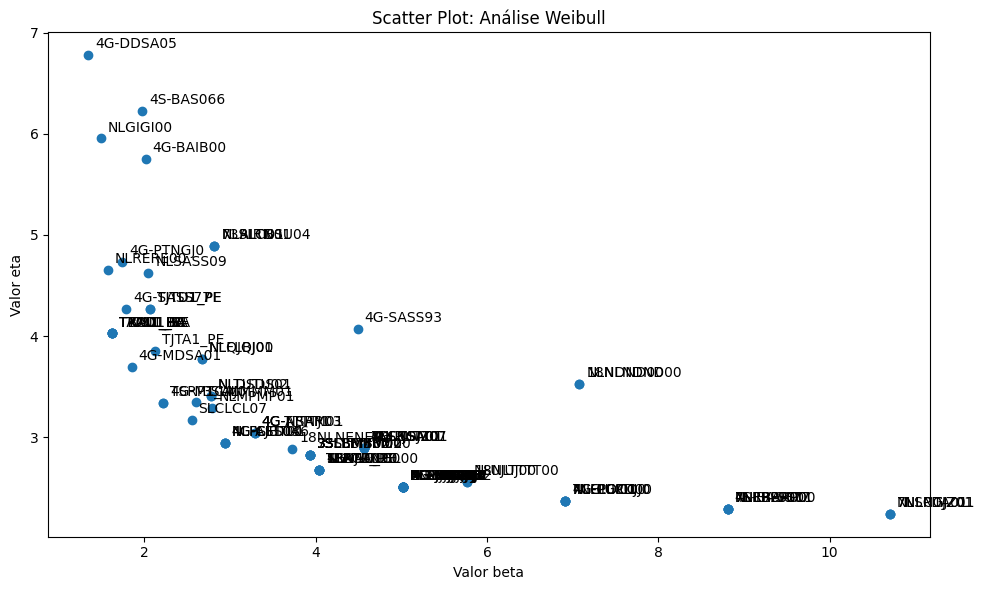

In [8]:
import matplotlib.pyplot as plt

# Criar o scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dfWeibull["beta"], dfWeibull["eta"])

# Adicionar o nome do site ao lado de cada ponto
for i, row in dfWeibull.iterrows():
    plt.annotate(row["Site"], (row["beta"], row["eta"]), xytext=(5, 5), textcoords="offset points")

# Definir rótulos e título do gráfico
plt.xlabel("Valor beta")
plt.ylabel("Valor eta")
plt.title("Scatter Plot: Análise Weibull")

#plt.yscale("log")
#plt.xscale("log")

# Exibir o gráfico
plt.show()

In [9]:
dfFalhas.loc[dfFalhas['Site']=='TLDG1_PE']

Site           Falhas
117  TLDG1_PE  [5.0, 5.0, 3.0]

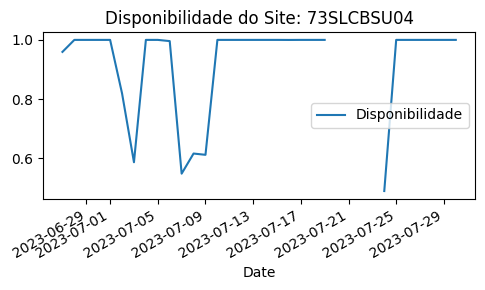

In [21]:
# Importando o módulo matplotlib.pyplot para mostrar o gráfico
import matplotlib.pyplot as plt

# Definindo uma variável com o nome do site
nome_site = "73SLCBSU04"

# Filtrando as linhas que correspondem ao site
site = tabelaOriginal.loc[tabelaOriginal["Site"] == nome_site]

# Plotando o gráfico de linhas com a data no eixo x e a disponibilidade no eixo y, diminuindo o tamanho do gráfico e adicionando o título com a variável
site.plot(x="Date", y="Disponibilidade", kind="line", figsize=(5, 3), title="Disponibilidade do Site: {}".format(nome_site))

# Mostrando o gráfico
plt.show()


In [56]:
tabela

Date        Site  Disponibilidade
22323 2023-04-28  18NLAJAJ00         1.000000
22324 2023-04-29  18NLAJAJ00         1.000000
22325 2023-04-30  18NLAJAJ00         1.000000
22326 2023-05-01  18NLAJAJ00         1.000000
22327 2023-05-02  18NLAJAJ00         0.999028
...          ...         ...              ...
53620 2023-07-23    TVTO1_PE         1.000000
53621 2023-07-24    TVTO1_PE         1.000000
53622 2023-07-25    TVTO1_PE         1.000000
53623 2023-07-26    TVTO1_PE         1.000000
53624 2023-07-27    TVTO1_PE         1.000000

[56746 rows x 3 columns]